# Part II - Prosper Loan Data Exploration 

### By Adeniran Rdiwan

### Investigation Overview

The overall goal of this presentation is to carry out explanatory analysis of specific features of interest, show the univariate, bivariate and multivariate relationship between them, and how dependent and independent each feature are to another.

some of the feature of interest includes Occupation,StatedMonthlyIncome,IncomeRange,BorrowerRate,LoanOriginalAmount and DebtToIncomeRatio

### Dataset Overview

The dataset used for this project is called the **Prosper Loan Dataset** provided by udacity. This dataset consists of borrowers and loan's informations with 113,937 rows and 81 features. 

During analysis, a subset dataset was created to focus on only the features of interest.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv(r'C:\Users\Master Ridwan\Desktop\my data\prosperLoanData.csv', header = 0)

In [3]:
#lets copy the original data
loan_df = data.copy()

In [4]:
#selecting features of interest
cols =['ListingKey', 'ListingCreationDate', 'MemberKey','EmploymentStatus', 'Occupation','IncomeVerifiable','StatedMonthlyIncome', 'IncomeRange','BorrowerAPR','BorrowerRate','BorrowerState','DebtToIncomeRatio','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','LoanKey','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter','Term','ClosedDate', 'TotalProsperLoans']
data_df = loan_df[cols]
data_df.head()

,ListingKey,ListingCreationDate,MemberKey,EmploymentStatus,Occupation,IncomeVerifiable,StatedMonthlyIncome,IncomeRange,BorrowerAPR,BorrowerRate,...,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,LoanKey,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,Term,ClosedDate,TotalProsperLoans
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,1F3E3376408759268057EDA,Self-employed,Other,True,3083.333333,"$25,000-49,999",0.16516,0.1580,...,True,640.0,659.0,E33A3400205839220442E84,9425,2007-09-12 00:00:00,Q3 2007,36,2009-08-14 00:00:00,NaN
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,1D13370546739025387B2F4,Employed,Professional,True,6125.000000,"$50,000-74,999",0.12016,0.0920,...,False,680.0,699.0,9E3B37071505919926B1D82,10000,2014-03-03 00:00:00,Q1 2014,36,NaN,NaN
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,5F7033715035555618FA612,Not available,Other,True,2083.333333,Not displayed,0.28269,0.2750,...,False,480.0,499.0,6954337960046817851BCB2,3001,2007-01-17 00:00:00,Q1 2007,36,2009-12-17 00:00:00,NaN
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,9ADE356069835475068C6D2,Employed,Skilled Labor,True,2875.000000,"$25,000-49,999",0.12528,0.0974,...,True,800.0,819.0,A0393664465886295619C51,10000,2012-11-01 00:00:00,Q4 2012,36,NaN,NaN
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36CE356043264555721F06C,Employed,Executive,True,9583.333333,"$100,000+",0.24614,0.2085,...,True,680.0,699.0,A180369302188889200689E,15000,2013-09-20 00:00:00,Q3 2013,36,NaN,1.0


# VISUALIZATIONS

# Distribution of Employment Status 

- Of all the Employment Status, most of the borrowers are categorized under employment while a very few of them are categorized as retired.

Text(0.5, 1.0, 'Total Sum of Borrower Per EmploymentStatus')

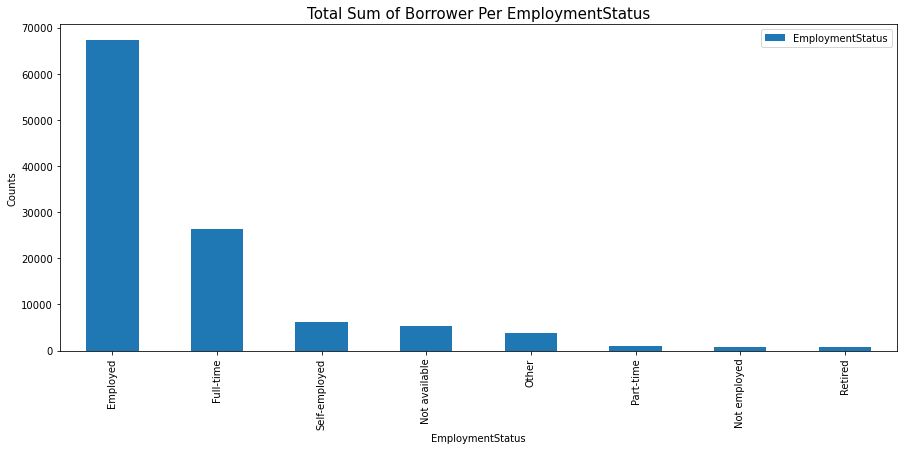

In [5]:
#Show the plot Distribution of Employment Status by counts
plt.figure(figsize = (15,6))
data_df['EmploymentStatus'].value_counts().plot.bar()
plt.legend()
plt.xlabel('EmploymentStatus')
plt.ylabel('Counts')
plt.title('Total Sum of Borrower Per EmploymentStatus', size = 15)

# Distribution of Stated Monthly Income 

- The distribution of Stated Monthly Income is left skewed with more of the borrowers having less than $4000 

Text(0.5, 1.0, 'Distribution of Stated Monthly Income')

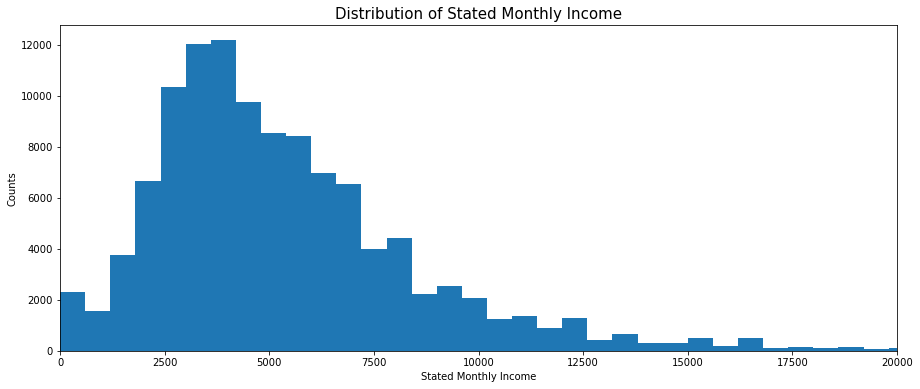

In [6]:
#Create an Histogram for Stated Monthly Income Distribution
plt.figure(figsize = [15, 6])
bin= np.arange(0, data_df['StatedMonthlyIncome'].max()+600, 600)
plt.hist(data= data_df, x = 'StatedMonthlyIncome', bins= bin)
plt.xlim(0, 20000)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Counts')
plt.title('Distribution of Stated Monthly Income', size = 15)

# Correlation Between Different Numerical Variables

- The visualization shows the correlation between different numerical variables. The borrower interest Rate and loan original amount are negatively correlated, which means the more the loan amount, the lower the Borrower Rate.

- The loan original amount is positively correlated to the stated monthly income. That is, the higher their stated monthly income, the higher the loan amount

In [7]:
cols =['StatedMonthlyIncome','BorrowerAPR','BorrowerRate','DebtToIncomeRatio','CreditScoreRangeLower','CreditScoreRangeUpper','LoanOriginalAmount','Term']
corr_df = data_df[cols]

Text(0.5, 1.0, 'Relationship between two numerical variables')

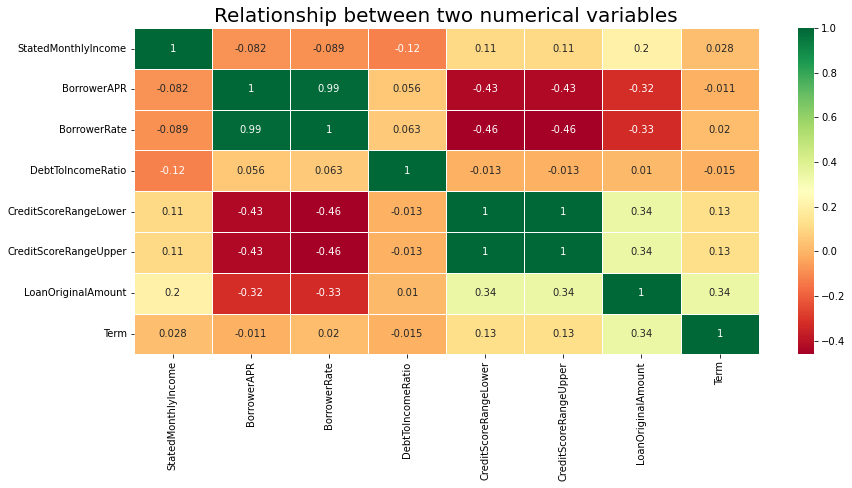

In [8]:
#shows the heapmap for the relationship betwen some numercal variables
plt.figure(figsize = (14,6))
heapmap  =sns.heatmap (corr_df.corr(), annot = True, cmap = 'RdYlGn', linewidths = .9)
plt.title('Relationship between two numerical variables', size = 20)

# Distribution of Borrower State

- Of all State, State with CA tends to have the highest number of borrower.

Text(0.5, 1.0, 'Total Sum of Borrowers Per Borrower State')

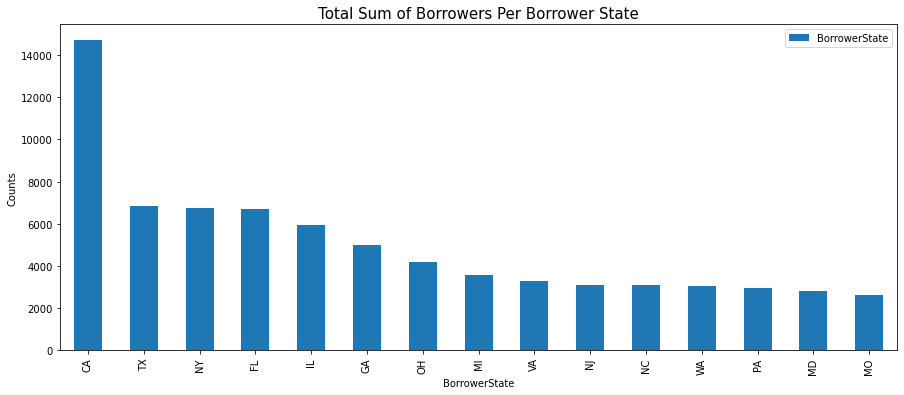

In [9]:
#Show the plot Distribution of Borrower State by counts
plt.figure(figsize = (15,6))
data_df['BorrowerState'].value_counts().head(15).plot.bar()
plt.legend()
plt.xlabel('BorrowerState')
plt.ylabel('Counts')
plt.title('Total Sum of Borrowers Per Borrower State', size = 15)

# Distribution of Term

- The Pie chart below shows that most borrowers have 36 months Term

Text(0.5, 1.0, 'Number of Term Ditribution')

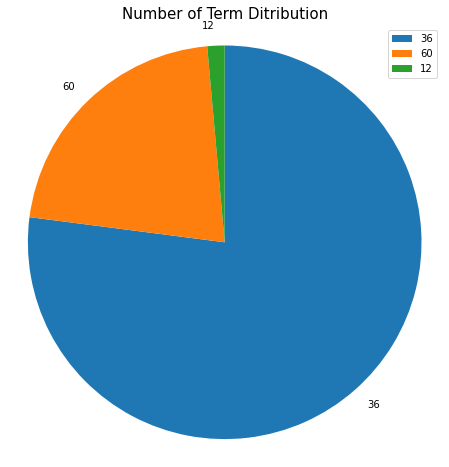

In [10]:
#Create an bar chart for Term Distribution
plt.figure(figsize = [14, 8])
sorted_counts = data_df['Term'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.legend()
plt.title('Number of Term Ditribution', size = 15)

# Relationship Between The Loan Original Amount and Term Based  Income Verifiable

- The Visualiation shows that higher the orignal amount of the loan, the higher length of the loan express in months

Text(0.5, 1.0, 'The Sum Distribution of Loan Original Amount vs Term in IncomeVerifiable ')

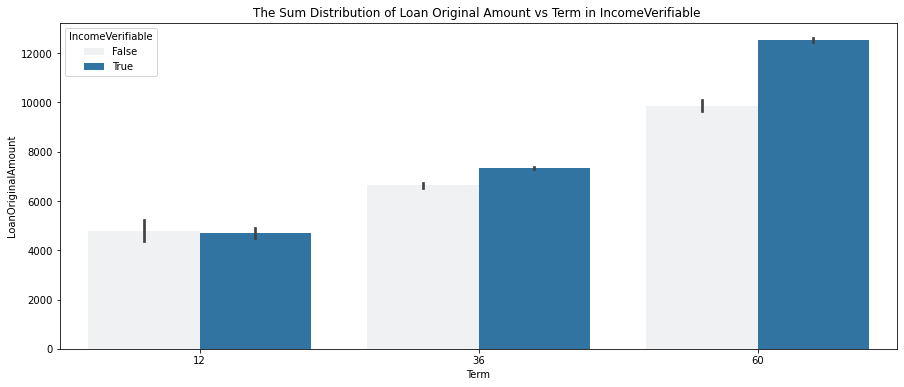

In [11]:
#Show barchart for the realationship between LoanOriginalAmount and term
plt.figure(figsize = [15, 6])
color_pal = sns.color_palette()[0]
sns.barplot(data= data_df, x= 'Term', y = 'LoanOriginalAmount' , hue = 'IncomeVerifiable', color = color_pal)
plt.xlabel("Term")
plt.ylabel("LoanOriginalAmount")
plt.title("The Sum Distribution of Loan Original Amount vs Term in IncomeVerifiable ")